In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from matplotlib import font_manager

font_dirs = ['style/fonts/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

plt.style.use('default')
plt.style.use('style/style.mplstyle')

In [13]:
df = pd.read_csv('../data/fenomeno/stereotipi/Percezione diffusione violenza nella coppia - età (2018).csv')
df = df[["SEXISTAT1", "Classe di età", "Livello di diffusione", "Value"]]
df.head()

,SEXISTAT1,Classe di età,Livello di diffusione,Value
0,M,30-44 anni,non indicato,0.9
1,F,30-44 anni,non indicato,0.6
2,T,30-44 anni,non indicato,0.8
3,M,30-44 anni,tutte le voci,100.0
4,F,30-44 anni,tutte le voci,100.0


In [14]:
maschi = df[(df["SEXISTAT1"] == "M") & (df["Livello di diffusione"] != "tutte le voci")]
femmine = df[(df["SEXISTAT1"] == "F") & (df["Livello di diffusione"] != "tutte le voci")]

maschi.head(10)

,SEXISTAT1,Classe di età,Livello di diffusione,Value
0,M,30-44 anni,non indicato,0.9
6,M,30-44 anni,molto diffuso,31.2
9,M,30-44 anni,abbastanza diffuso,49.5
12,M,30-44 anni,poco diffuso,13.3
15,M,30-44 anni,per niente diffuso,0.8
18,M,30-44 anni,non sa,4.4
21,M,totale,non indicato,1.6
27,M,totale,molto diffuso,30.8
30,M,totale,abbastanza diffuso,51.0
33,M,totale,poco diffuso,11.7


In [15]:
maschi_tot = maschi[maschi["Classe di età"] == "totale"]
femmine_tot = femmine[femmine["Classe di età"] == "totale"]

In [16]:
maschi_tot

,SEXISTAT1,Classe di età,Livello di diffusione,Value
21,M,totale,non indicato,1.6
27,M,totale,molto diffuso,30.8
30,M,totale,abbastanza diffuso,51.0
33,M,totale,poco diffuso,11.7
36,M,totale,per niente diffuso,1.0
39,M,totale,non sa,3.9


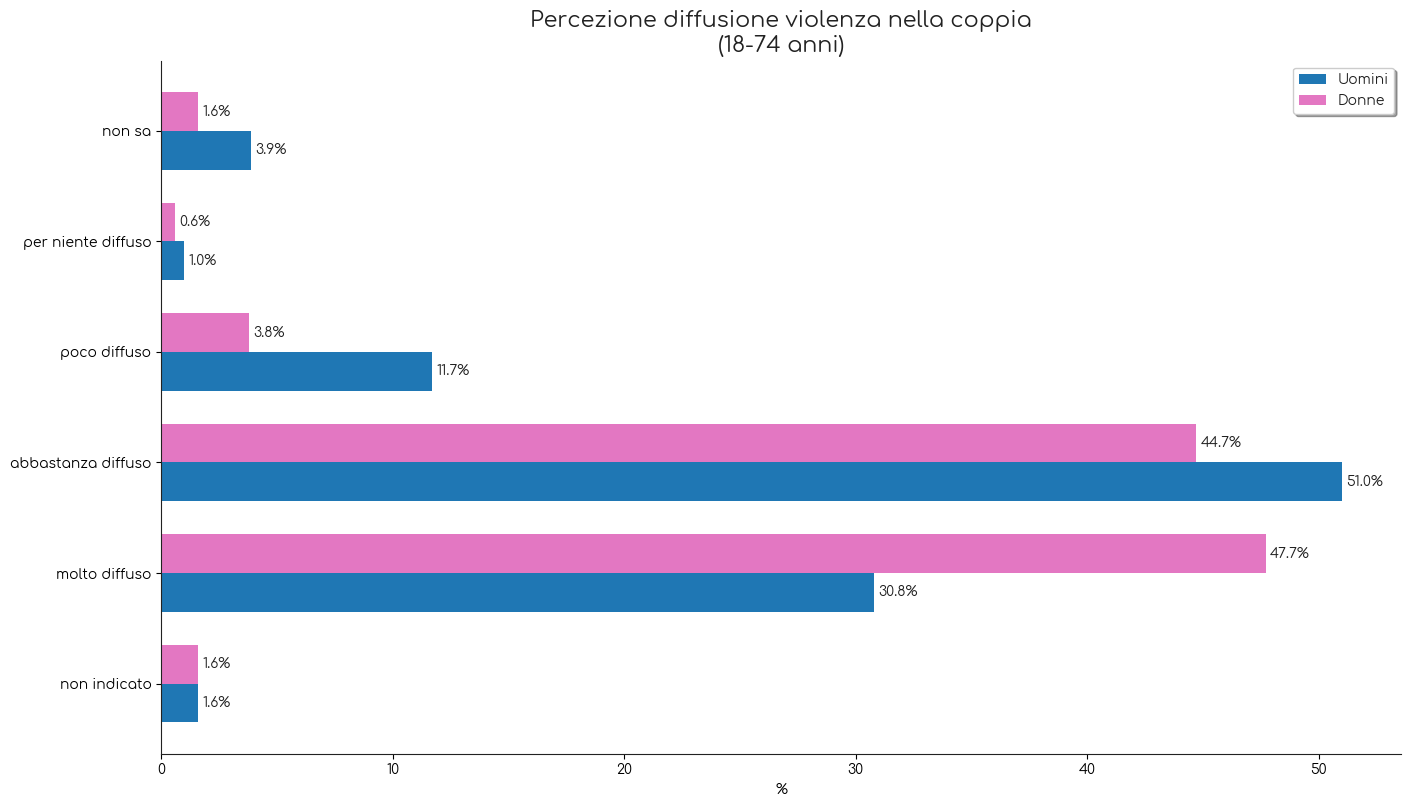

In [17]:
ticks = np.arange(6)
width = 0.35

fig, ax = plt.subplots(figsize=(16,9))

bars1 = ax.barh(ticks-width/2, maschi_tot.Value, width, label="Uomini", color='C0')
bars2 = ax.barh(ticks+width/2, femmine_tot.Value, width, label="Donne", color='C6')

ax.bar_label(bars1, padding=3, fmt="%.1f%%")
ax.bar_label(bars2, padding=3, fmt="%.1f%%")

ax.set_title("Percezione diffusione violenza nella coppia\n(18-74 anni)")
ax.set_yticks(ticks, labels=femmine_tot["Livello di diffusione"])
ax.set_xlabel("%")
ax.legend()

plt.show()

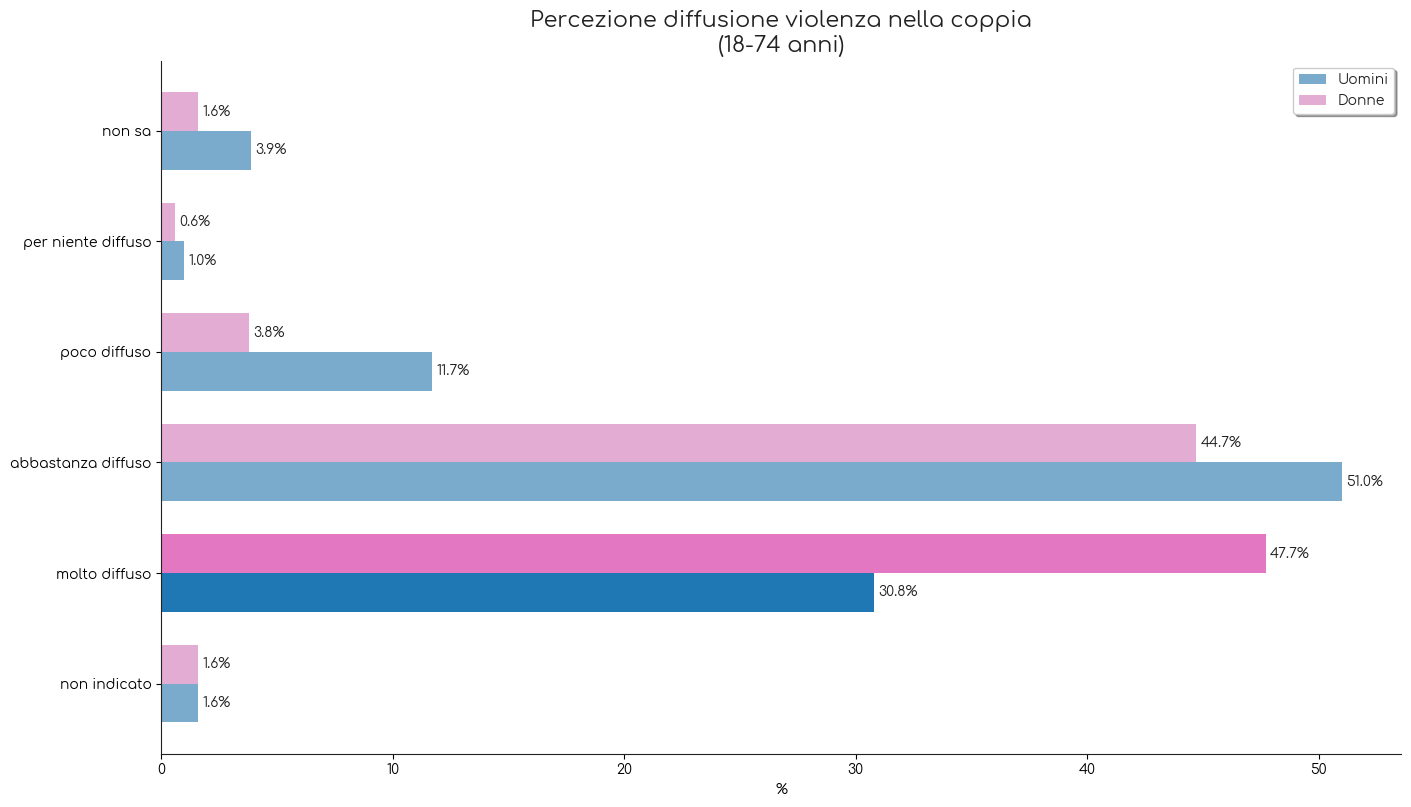

In [18]:
ticks = np.arange(6)
width = 0.35

fig, ax = plt.subplots(figsize=(16,9))

bars1 = ax.barh(ticks-width/2, maschi_tot.Value, width, label="Uomini", color=['#7AAACC','C0','#7AAACC','#7AAACC','#7AAACC'])
bars2 = ax.barh(ticks+width/2, femmine_tot.Value, width, label="Donne", color=['#E3ACD3','C6','#E3ACD3','#E3ACD3','#E3ACD3'])

ax.bar_label(bars1, padding=3, fmt="%.1f%%")
ax.bar_label(bars2, padding=3, fmt="%.1f%%")

ax.set_title("Percezione diffusione violenza nella coppia\n(18-74 anni)")
ax.set_yticks(ticks, labels=femmine_tot["Livello di diffusione"])
ax.set_xlabel("%")
ax.legend()

plt.show()

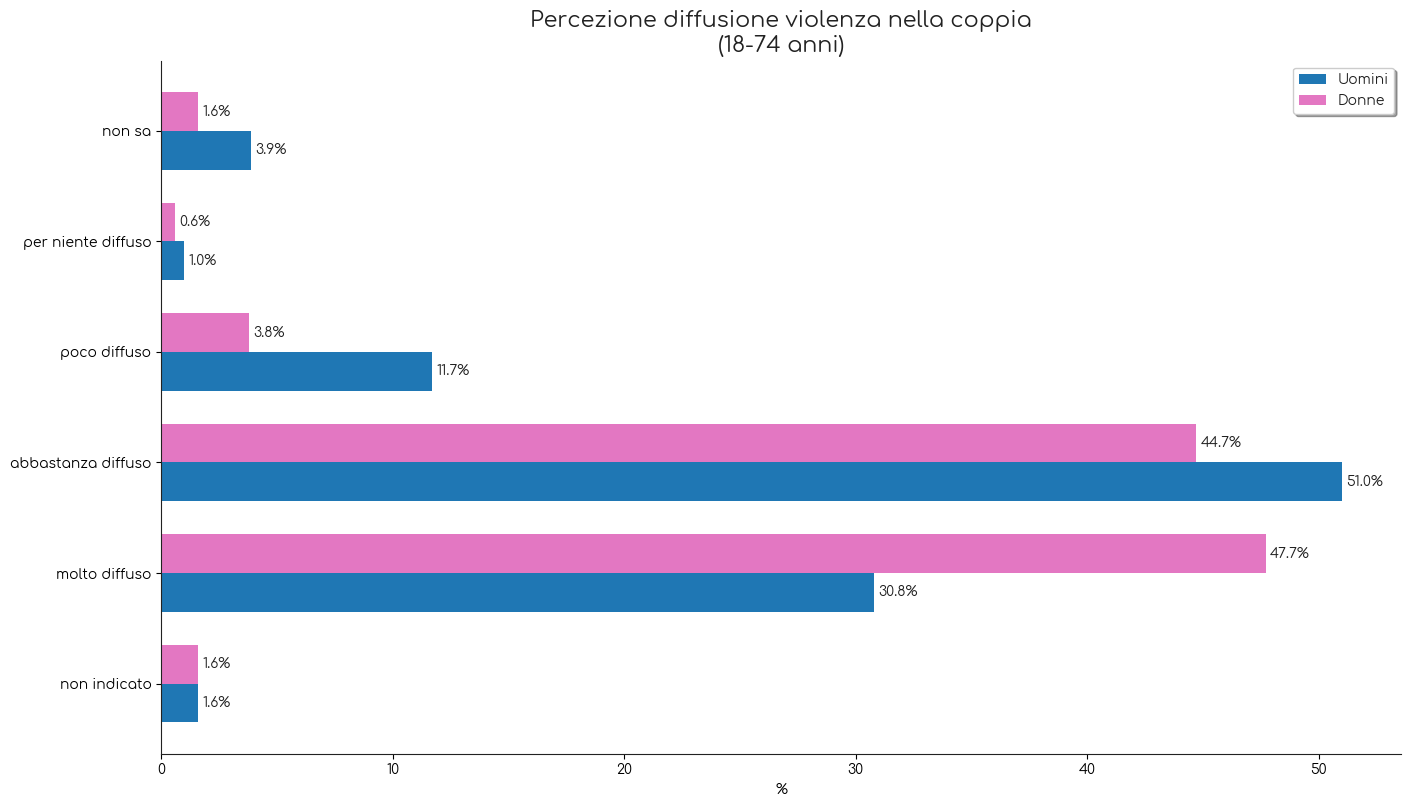

In [19]:
ticks = np.arange(6)
width = 0.35

fig, ax = plt.subplots(figsize=(16,9))

bars1 = ax.barh(ticks-width/2, maschi_tot.Value, width, label="Uomini", color='C0')
bars2 = ax.barh(ticks+width/2, femmine_tot.Value, width, label="Donne", color='C6')

ax.bar_label(bars1, padding=3, fmt="%.1f%%")
ax.bar_label(bars2, padding=3, fmt="%.1f%%")

ax.set_title("Percezione diffusione violenza nella coppia\n(18-74 anni)")
ax.set_yticks(ticks, labels=femmine_tot["Livello di diffusione"])
ax.set_xlabel("%")
ax.legend()

plt.show()

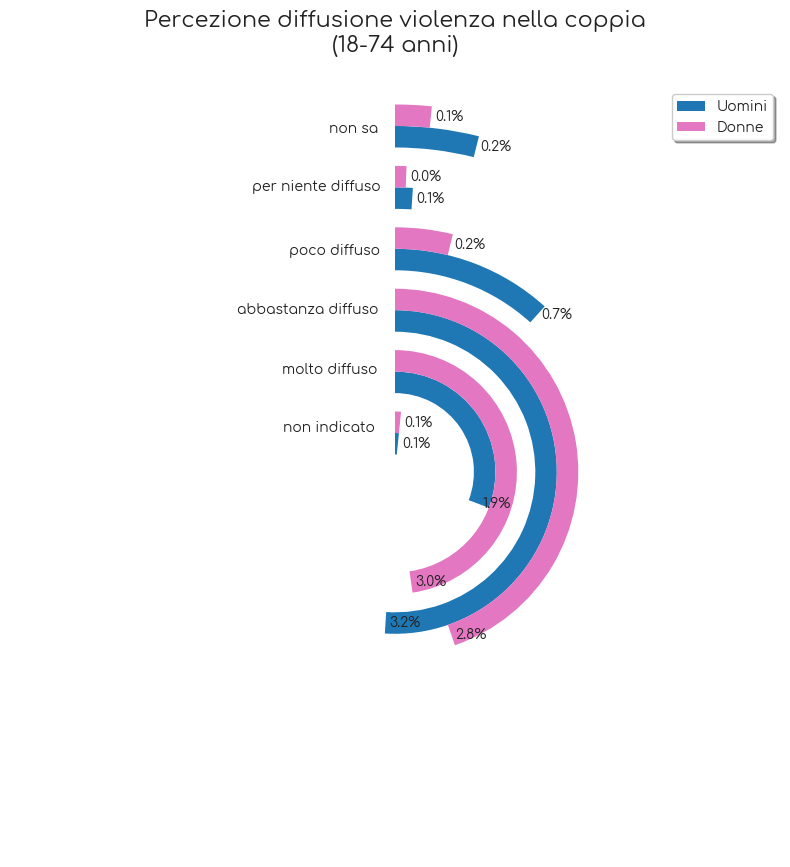

In [20]:
ticks = np.arange(6)
width = 0.35

ax = plt.subplot(projection='polar')

ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_rlabel_position(0)

bars1 = ax.barh(ticks-width/2, np.radians(maschi_tot.Value*3.6), width, label="Uomini", color='C0')
bars2 = ax.barh(ticks+width/2, np.radians(femmine_tot.Value*3.6), width, label="Donne", color='C6')

ax.bar_label(bars1, padding=3, fmt="%.1f%%")
ax.bar_label(bars2, padding=3, fmt="%.1f%%")

ax.set_title("Percezione diffusione violenza nella coppia\n(18-74 anni)")
ax.set_yticks(ticks, labels=femmine_tot["Livello di diffusione"])
ax.set_xlabel("%")
ax.legend()
ax.grid(False)
ax.set_frame_on(False)
ax.set_axis_off()

plt.annotate("non sa", (np.radians(349), 5))
plt.annotate("per niente diffuso", (np.radians(333), 4.5))
plt.annotate("poco diffuso", (np.radians(334),3.3))
plt.annotate("abbastanza diffuso", (np.radians(315), 3))
plt.annotate("molto diffuso", (np.radians(311), 1.8))
plt.annotate("non indicato", (np.radians(290), 1.3))

plt.show()

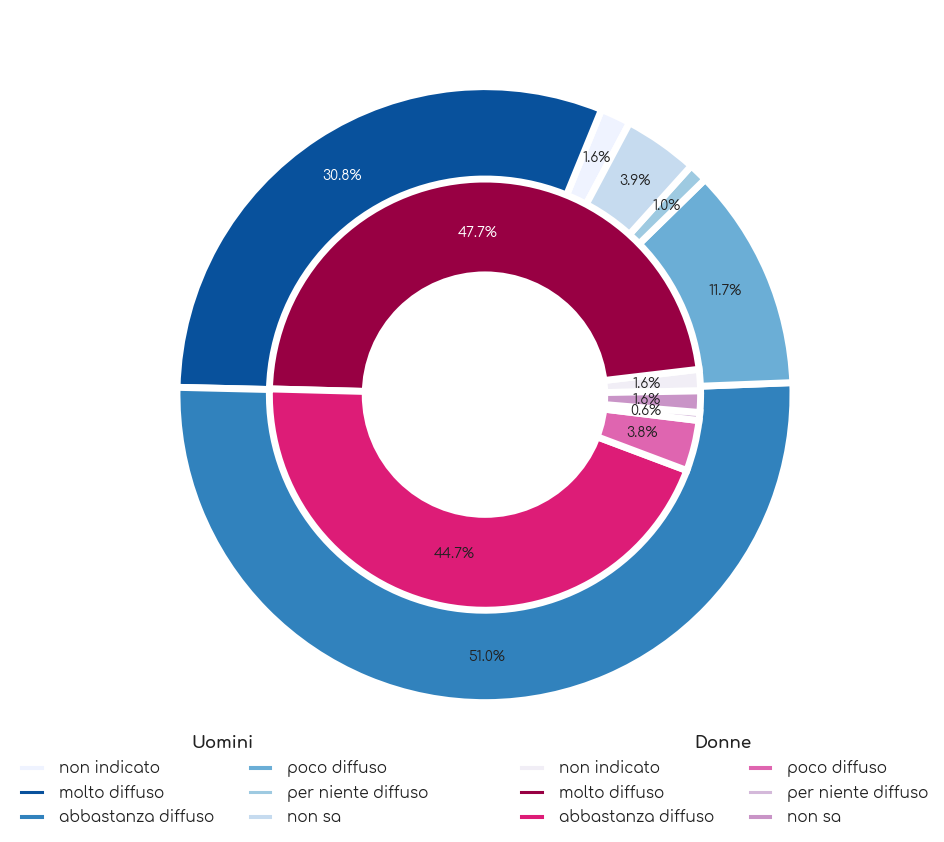

In [35]:
male_colors = ["#eff3ff","#08519c","#3182bd","#6baed6","#9ecae1","#c6dbef"]
female_colors = ["#f1eef6","#980043","#dd1c77","#df65b0","#d4b9da","#c994c7"]

def func(pct):
    return f"{pct:.1f}%"

fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(maschi_tot['Value'], startangle=62, wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'white' },
        colors=male_colors, autopct=lambda pct: func(pct), pctdistance=0.85,)

male_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(male_circle)

wedges2, text2, autotexts2 = ax.pie(femmine_tot['Value'],  startangle=1, wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'white' },
        colors=female_colors, radius=0.7, autopct=lambda pct: func(pct), pctdistance=0.75)

male_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(male_circle)

# plt.annotate("Percezione\nDiffusione\nViolenza\nNella Coppia", (0,0), ha='center', va='center', font='Roboto', fontsize=16, weight='bold')

autotexts[1].set_color('white')
autotexts2[1].set_color('white')

fig.legend(wedges, maschi_tot["Livello di diffusione"],
        numpoints=1,
        title="Uomini",
        title_fontproperties={'weight':'bold', 'size':12},
        loc="lower center",
        bbox_to_anchor=(0.25, 0.05, 0, 1),
        shadow=False,
        frameon=False,
        fontsize=11,
        ncol=2
)

fig.legend(wedges2, maschi_tot["Livello di diffusione"],
        numpoints=1,
        title="Donne",
        title_fontproperties={'weight':'bold', 'size':12},
        loc="lower center",
        bbox_to_anchor=(0.75, 0.05, 0, 1),
        shadow=False,
        frameon=False,
        fontsize=11,
        ncol=2
)

plt.show()